<h2><center>Customer Segmentation / Clustering<center><b>

<b>Task 3: Customer Segmentation Using Clustering Techniques

<h3>Importing Libraries and Loading Data

This section imports necessary libraries, such as pandas, scikit-learn for modeling, and matplotlib & seaborn for visualizations. You load the three datasets: Customers.csv, Transactions.csv, and Products.csv.

In [191]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")


<H3>Feature Engineering: Data Preparation

This section create new features based on the Transactions data: total spending and transaction count per customer. And join this data with the Customers dataset to have a unified customer feature table.


In [192]:
# Feature engineering: Extract meaningful features from transaction data
# Total spending per customer
spending = transactions.groupby('CustomerID')['TotalValue'].sum().rename('TotalSpending')

# Transaction count per customer
transaction_count = transactions.groupby('CustomerID').size().rename('TransactionCount')

# Merge the datasets into a single DataFrame with customer features
customer_features = customers.set_index('CustomerID').join([spending, transaction_count])

# Fill missing values with 0 (or use another strategy if necessary)
customer_features.fillna(0, inplace=True)

# Display the customer features
print(customer_features.head())


                  CustomerName         Region  SignupDate  TotalSpending  \
CustomerID                                                                 
C0001         Lawrence Carroll  South America  2022-07-10        3354.52   
C0002           Elizabeth Lutz           Asia  2022-02-13        1862.74   
C0003           Michael Rivera  South America  2024-03-07        2725.38   
C0004       Kathleen Rodriguez  South America  2022-10-09        5354.88   
C0005              Laura Weber           Asia  2022-08-15        2034.24   

            TransactionCount  
CustomerID                    
C0001                    5.0  
C0002                    4.0  
C0003                    4.0  
C0004                    8.0  
C0005                    3.0  


<h3>Data Scaling (Normalization)

Data scaling ensures the features are on the same scale, which is essential for K-Means clustering. Here, MinMaxScaler from scikit-learn is used to normalize the TotalSpending and TransactionCount features.

In [193]:
# Scaling the features (Normalization)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpending', 'TransactionCount']])

# Display the scaled features
print(scaled_features[:5])


[[0.31427402 0.45454545]
 [0.17451402 0.36363636]
 [0.25533195 0.36363636]
 [0.50168121 0.72727273]
 [0.1905813  0.27272727]]


<h3>Choosing the Number of Clusters (Elbow Method)

The Elbow Method helps determine the optimal number of clusters by plotting the inertia (within-cluster sum of squared distances) for different values of k. This is done by fitting the KMeans model for k values from 2 to 10 and plotting the result.

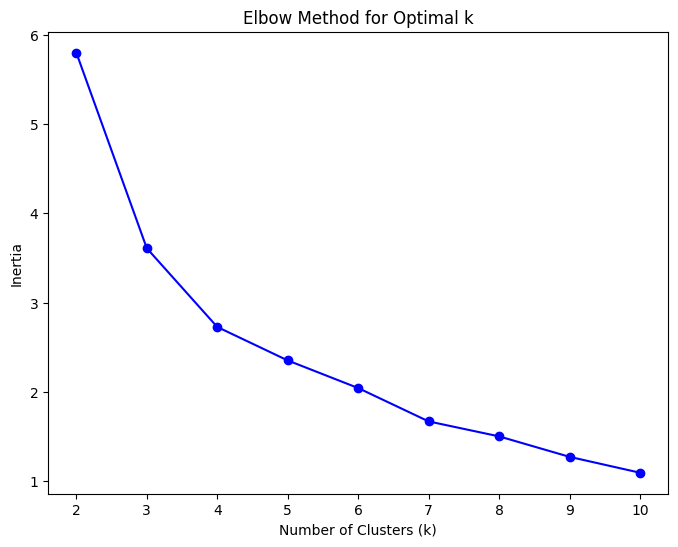

In [194]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(2, 11):  # Testing k between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


The optimal k is found at the "elbow point" where the reduction in inertia slows down significantly. In this case, the elbow occurs at k = 4 or 5, suggesting that using 4 or 5 clusters provides a good balance between minimizing inertia and avoiding overfitting. Beyond k = 5, the decrease in inertia becomes less pronounced, indicating diminishing returns from adding more clusters.

<h3>K-Means Clustering

In [195]:
# After identifying optimal k (e.g., k = 4)
optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster assignments
print(customer_features.head())


                  CustomerName         Region  SignupDate  TotalSpending  \
CustomerID                                                                 
C0001         Lawrence Carroll  South America  2022-07-10        3354.52   
C0002           Elizabeth Lutz           Asia  2022-02-13        1862.74   
C0003           Michael Rivera  South America  2024-03-07        2725.38   
C0004       Kathleen Rodriguez  South America  2022-10-09        5354.88   
C0005              Laura Weber           Asia  2022-08-15        2034.24   

            TransactionCount  Cluster  
CustomerID                             
C0001                    5.0        2  
C0002                    4.0        2  
C0003                    4.0        2  
C0004                    8.0        0  
C0005                    3.0        1  


<h3>Clustering Evaluation (Davies-Bouldin Index)

In [196]:
# Calculate Davies-Bouldin Index (DBI) for clustering evaluation
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.8453452777212103


<h3> Cluster Visualization

This section uses a scatter plot to visualize the clusters. The x-axis represents total spending, the y-axis represents transaction count, and each cluster is colored differently.

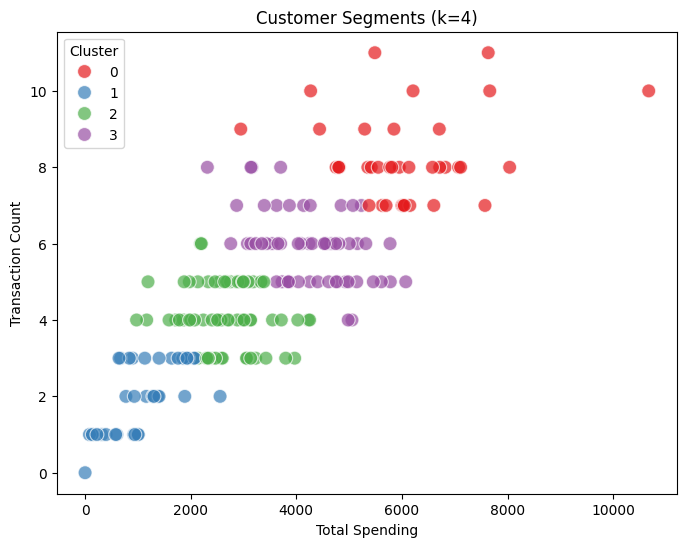

In [197]:
# Visualize the clusters in a 2D plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_features['TotalSpending'], y=customer_features['TransactionCount'], 
                hue=customer_features['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title(f'Customer Segments (k={optimal_k})')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()


The scatter plot with 4 clusters reveals distinct customer segments: Cluster (Blue) has low spending and transaction count, suggesting a need for promotions. Cluster  (Red) consists of high spenders with fewer transactions, ideal for exclusive benefits. Cluster (Green) is balanced, suitable for upselling or cross-selling. Cluster  (Purple) makes frequent, low-value purchases, benefiting from bundle deals.

<h3>Results and Insights

In [198]:
# Create a summary of the clustering results
print(f"Number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")


Number of clusters: 4
Davies-Bouldin Index: 0.8453452777212103


A Davies-Bouldin Index (DBI) of 0.845 indicates that the clustering is good, with reasonably well-separated and compact clusters. The value suggests effective segmentation, meaning the customer groups are distinct and the model has done a solid job in differentiating them.